1. [LO 1, LO 2 – 30 Poin] Buatlah model machine learning yang berisi proses pre-processing machine 
learning, training, dan hasil dari perbadingan 2 algoritma machine learning yaitu Random Forest dan 
Xgboost. Ambil algoritma terbaik dan simpan dengan menggunakan pickle. Seluruh proses disimpan 
dengan extension .ipynb 

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read csv file
df=pd.read_csv('Dataset_A_loan.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


EDA

For numerical variables no false values, only very extreme ranges

In [6]:
#foundout the statistical summary of dataframe
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [39]:
#checking extreme value in age
df[df['person_age'] > 80]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,NaN,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32416,94.0,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32506,84.0,male,High School,114705.0,61,MORTGAGE,10000.0,PERSONAL,7.51,0.09,24.0,784,Yes,0
37930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


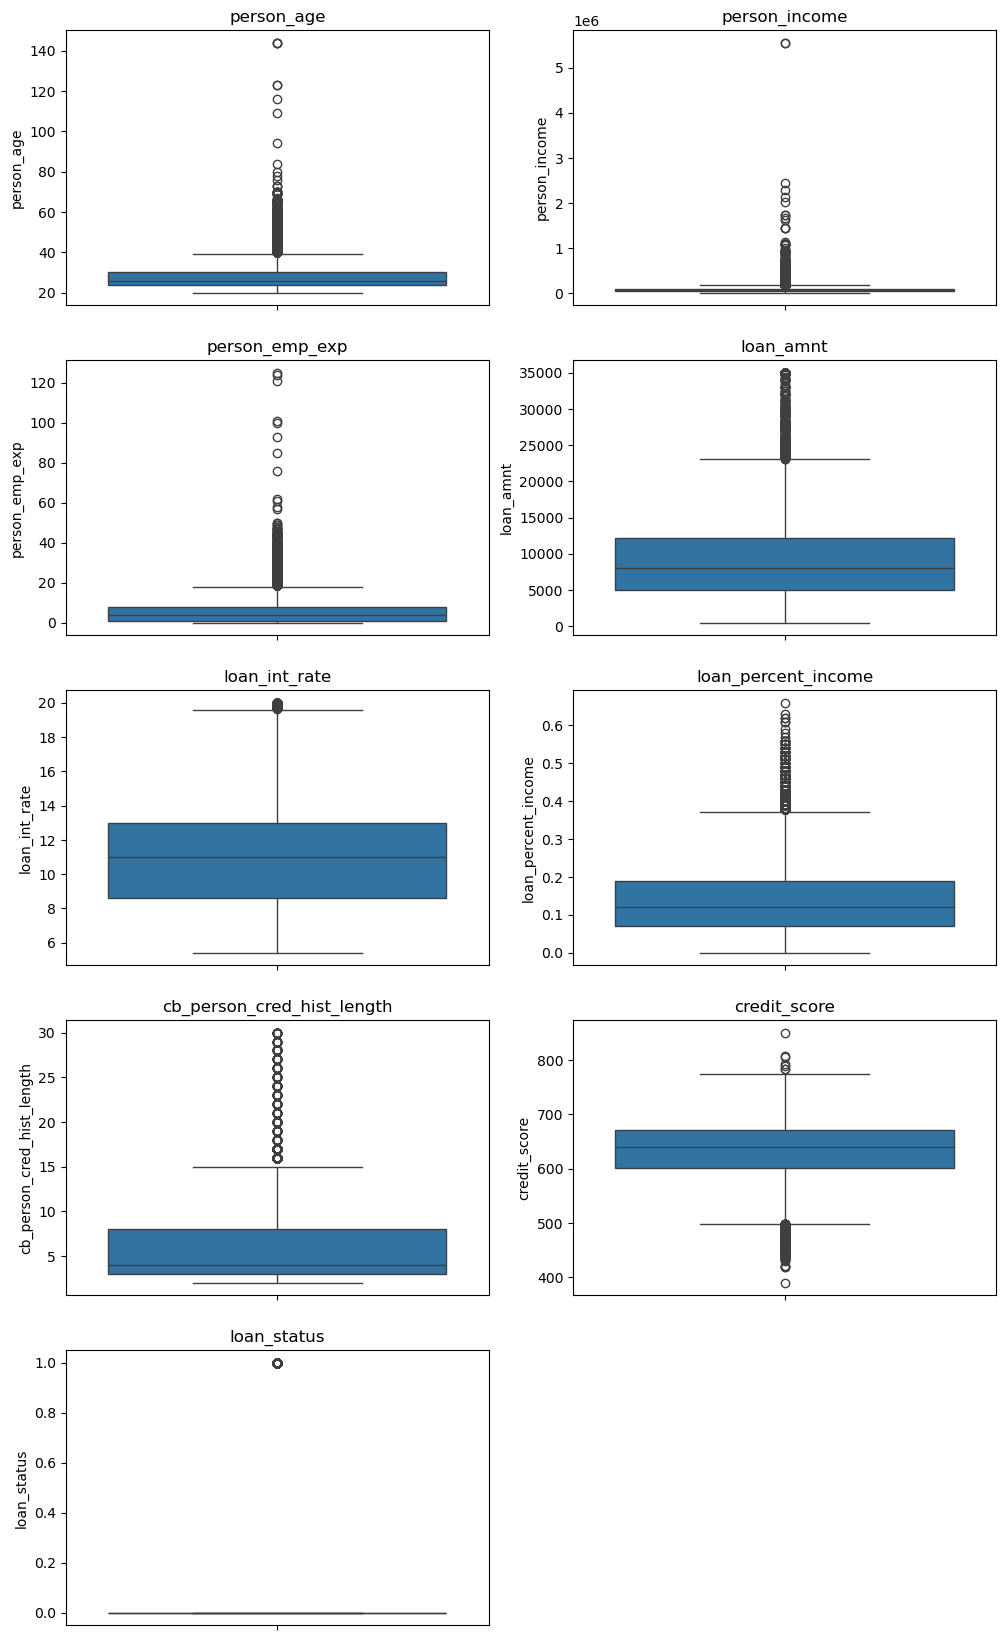

In [17]:
#checking outliers with boxplot
plt.figure(figsize=(12,25))
for i, col in enumerate(df.select_dtypes(include=np.number)):
  plt.subplot(6,2,i+1)
  sns.boxplot(df[col])
  plt.title(col)

person_income has 5% of missing value (2250/45000), solved this by imputating mean after splitting

In [34]:
df.isna().sum()

person_age                           0
person_gender                        0
person_education                     0
person_income                     2250
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
loan_status                          0
dtype: int64

In [15]:
df.shape

(45000, 14)

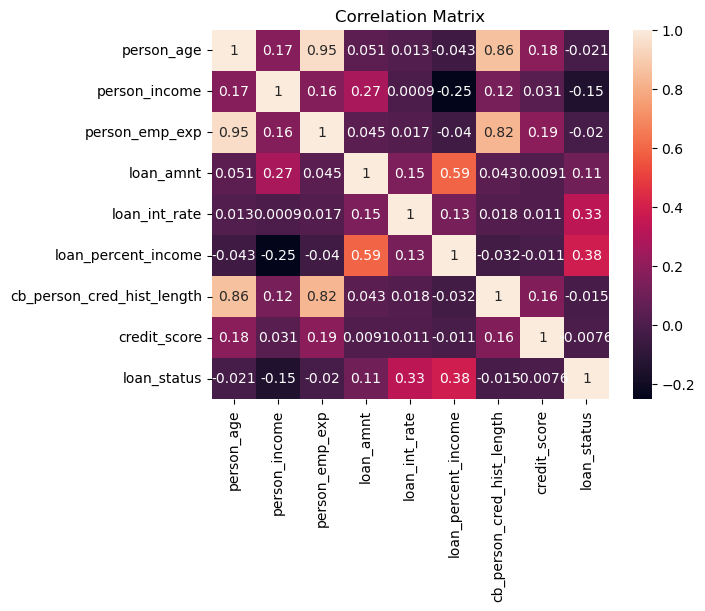

In [14]:
#correlation matrix with pearson
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

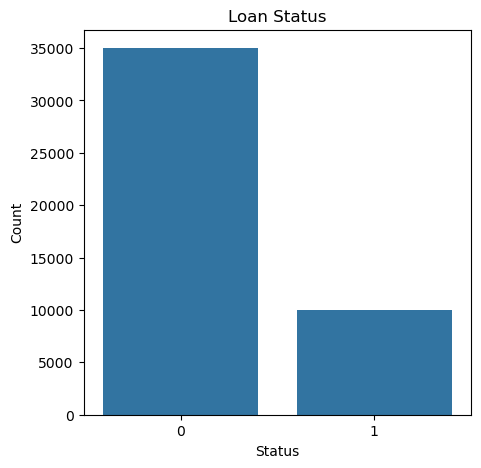

In [53]:
#plotting target variable
target = df['loan_status'].value_counts()

plt.figure(figsize=(5,5))
sns.barplot(x=target.index, y=target.values)
plt.title('Loan Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [37]:
#finding unique categorical data types
categorical = df.select_dtypes(exclude=[np.number])
for i in categorical:
  print(f"{i}: {list(set(df[i]))}")

person_gender: ['female', 'male', 'fe male', 'Male']
person_education: ['Associate', 'Doctorate', 'High School', 'Master', 'Bachelor']
person_home_ownership: ['OTHER', 'RENT', 'MORTGAGE', 'OWN']
loan_intent: ['DEBTCONSOLIDATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT', 'EDUCATION']
previous_loan_defaults_on_file: ['Yes', 'No']


person_gender has wrong inputs, other categorical data types has normal values

In [45]:
#fixing false inputs
df['person_gender'] = df['person_gender'].replace({
    'fe male': 'female',
    'Male': 'male'
})

PREPROCESSING

binary encoding previous_loan_defaults_on_file and person_gender

In [46]:
#binary encoding
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({
    'Yes': 1,
    'No': 0
})

C:\Users\jess\AppData\Local\Temp\ipykernel_14204\1493299940.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({


In [48]:
df['person_gender'] = df['person_gender'].map({'male': 1, 'female': 0})

In [50]:
#one hot encoding
education_dummies = pd.get_dummies(df['person_education'], prefix='person_education')
home_dummies = pd.get_dummies(df['person_home_ownership'], prefix='person_home_ownership')
intent_dummies = pd.get_dummies(df['loan_intent'], prefix='loan_intent')

df = pd.concat([df, education_dummies, home_dummies, intent_dummies], axis=1)

df.drop(columns=['person_education', 'person_home_ownership', 'loan_intent'], inplace=True)

In [65]:
#splitting dataset, 80 train, 20 test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.loc[:, df.columns != 'loan_status'] ,df['loan_status'],test_size=0.2,random_state=0, stratify=df['loan_status'])

In [66]:
#imputation of person_income using mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train[['person_income']] = imputer.fit_transform(X_train[['person_income']])
X_test[['person_income']] = imputer.fit_transform(X_test[['person_income']])

In [68]:
#scaling using robust scaler to mitigate extreme values
from sklearn.preprocessing import RobustScaler

numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
exclude_cols = ['person_gender', 'previous_loan_defaults_on_file']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

scaler = RobustScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
4546,-0.333333,0,-0.087112,-0.285714,-0.436908,-0.567568,-0.416667,-0.4,-0.333333,1,...,False,False,False,True,False,False,True,False,False,False
20114,0.500000,1,-0.883583,0.000000,-0.554804,-1.259009,0.083333,0.4,-0.623188,1,...,False,False,False,True,False,False,False,False,False,True
22964,1.166667,0,-0.082706,0.428571,3.328826,0.950450,3.083333,0.6,-1.362319,0,...,True,False,False,False,True,False,False,False,False,False
27955,0.833333,1,0.298774,0.571429,-0.277402,-0.792793,-0.416667,0.4,0.231884,1,...,False,False,False,True,False,False,False,False,True,False
41918,0.166667,1,0.604487,0.142857,0.000000,-1.024775,-0.333333,0.2,-0.188406,0,...,True,False,False,False,False,False,False,True,False,False


In [70]:
#view of X_train that has been processed
X_train.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
4546,-0.333333,0,-0.087112,-0.285714,-0.436908,-0.567568,-0.416667,-0.4,-0.333333,1,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
20114,0.500000,1,-0.883583,0.000000,-0.554804,-1.259009,0.083333,0.4,-0.623188,1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
22964,1.166667,0,-0.082706,0.428571,3.328826,0.950450,3.083333,0.6,-1.362319,0,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False
27955,0.833333,1,0.298774,0.571429,-0.277402,-0.792793,-0.416667,0.4,0.231884,1,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
41918,0.166667,1,0.604487,0.142857,0.000000,-1.024775,-0.333333,0.2,-0.188406,0,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False


TRAINING

In [73]:
#using grid search to find best parameter of random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
RFCparams = {
               'max_depth': [2, 4, 6],
               'min_samples_split': [2, 3, 5],
               'min_samples_leaf': [1, 2, 3],
              }
gridRFC = GridSearchCV(estimator = rfc, param_grid = RFCparams, cv = 3, verbose=2, n_jobs = 4)
gridRFC.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5]},
             verbose=2)

In [77]:
#do the same with XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
paramsXGB = {
        'min_child_weight': [1, 5, 10],
        'gamma': [1, 2, 5],
        'max_depth': [3, 4, 5]
        }
gridXGB = GridSearchCV(estimator=xgb, param_grid=paramsXGB, n_jobs=4, verbose=2 )
gridXGB.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lea...=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'gamma': [1, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10]},
             verbose=2)

found the best parameters for both models

In [80]:
gridRFC.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [81]:
gridXGB.best_params_

{'gamma': 1, 'max_depth': 5, 'min_child_weight': 10}

In [83]:
#input hyperparameter into model
rfc_model = RandomForestClassifier(max_depth= 6, min_samples_leaf= 1, min_samples_split= 5).fit(X_train, y_train)
xgb_model = XGBClassifier(gamma= 1, max_depth= 5, min_child_weight= 10).fit(X_train, y_train)

In [88]:
#find the training accuracy
print(f'Random Forest Training Accuracy : {rfc_model.score(X_train, y_train)}')
print(f'XGBoost Training Accuracy : {xgb_model.score(X_train, y_train)}')

Random Forest Training Accuracy : 0.9191111111111111
XGBoost Training Accuracy : 0.9400277777777778


In [89]:
#find the accuracy of test datasets
rfc_pred = rfc_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

print(f'Random Forest Test Accuracy : {accuracy_score(rfc_pred, y_test)}')
print(f'XGBoost Test Accuracy : {accuracy_score(xgb_pred, y_test)}')

Random Forest Test Accuracy : 0.9195555555555556
XGBoost Test Accuracy : 0.9338888888888889


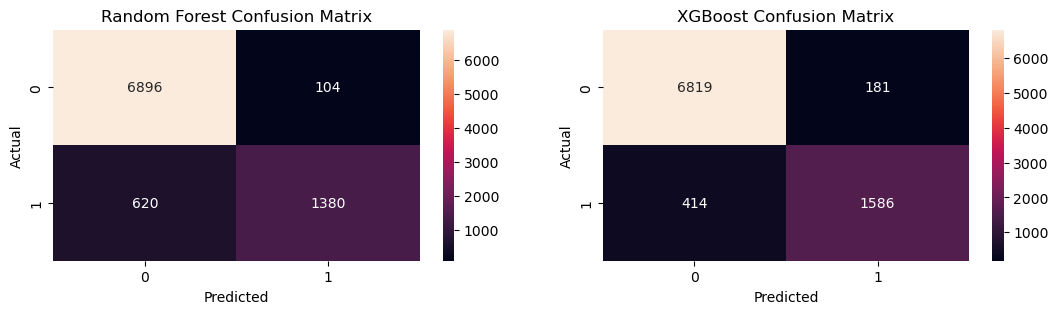

In [90]:
#confusion matrix for XGBoost and RandomForest
models = ['Random Forest', 'XGBoost']
preds = [rfc_pred, xgb_pred]

plt.figure(figsize=(13,3))
for i, (model, pred) in enumerate(zip(models, preds)):
  plt.subplot(1,2,i+1)
  sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
  plt.title(f'{model} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

In [91]:
#classification report
for i, (model, pred) in enumerate(zip(models, preds)):
  print(f'{model} Classification Report')
  print(classification_report(y_test, pred))
  print('-'*70)

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7000
           1       0.93      0.69      0.79      2000

    accuracy                           0.92      9000
   macro avg       0.92      0.84      0.87      9000
weighted avg       0.92      0.92      0.92      9000

----------------------------------------------------------------------
XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.90      0.79      0.84      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000

----------------------------------------------------------------------


From the results, XGBoost shows better performance than RandomForest, both on training and testing datasets. Leading me to choose XGBoost. Both models shows very good performance with the score of 0.9 however the results looks suspicious as there can be an indicator for data leakage and class imbalance of target variable that is leaning torwards 0.

Besides higher accuracy of XGB 0.93 vs RF 0.92, XGB also found more true positives 0.79 than random forest 0.69 indicated by high recall score. Which means XGBoost also have a higher chance of rejecting fraud cases which is crucial in a loaning company. 

The F1-score is also higher for XGB 0.84 vs RF 0.79 which indicades that XGBoost also offers balance performance

In [93]:
#save model as pkl file
import pickle as pkl
filename = 'XGB_class.pkl'
pkl.dump(xgb_model, open(filename, 'wb'))